# I will use this notebook to import the different datasets I created in my other notebooks and create my needed visualizations. 

In [19]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from shapely.geometry import Point, LineString
import folium

## First visualization will be a bar chart representing the black population of the predominantly black census tracts. 

In [2]:
race_by_tract = pd.read_csv('../data/davidson_tracts_pred_black.csv')

In [3]:
race_by_tract.head()

,Unnamed: 0,geoid,name,total_pop,total_pop_,white_alon,white_al_1,black_afri,black_af_1,nativeamer,...,white_pct,black_af_pct,nativeamer_pct,asian_alon_pct,hawaiian_p_pct,other_alon_pct,two_or_mor_pct,centroid,radius,buffer
0,5,14000US47037010105,"Census Tract 101.05, Davidson, TN",4435.0,328.0,967.0,174.0,3317.0,354.0,0.0,...,0.218038,0.747914,0.000000,0.000000,0.0,0.011048,0.022999,POINT (-86.85387694867056 36.24885011739272),3729.841782,4534.841782
1,6,14000US47037010106,"Census Tract 101.06, Davidson, TN",3397.0,288.0,1020.0,184.0,2192.0,207.0,0.0,...,0.300265,0.645275,0.000000,0.003827,0.0,0.040035,0.010598,POINT (-86.80361436262159 36.25371488856965),3190.149329,3995.149329
2,23,14000US47037010903,"Census Tract 109.03, Davidson, TN",5863.0,648.0,503.0,195.0,4741.0,539.0,0.0,...,0.085792,0.808630,0.000000,0.002388,0.0,0.085792,0.017397,POINT (-86.76382269139667 36.24932859655561),1911.288764,2716.288764
3,24,14000US47037010904,"Census Tract 109.04, Davidson, TN",3213.0,236.0,564.0,257.0,2624.0,303.0,0.0,...,0.175537,0.816682,0.000000,0.004357,0.0,0.003424,0.000000,POINT (-86.77321059142152 36.23431733718186),1398.075415,2203.075415
4,25,14000US47037011001,"Census Tract 110.01, Davidson, TN",6746.0,726.0,2547.0,645.0,3561.0,650.0,22.0,...,0.377557,0.527868,0.003261,0.011711,0.0,0.062111,0.017492,POINT (-86.75982876080599 36.22296311702502),1896.192256,2701.192256


In [10]:
race_sorted = race_by_tract.sort_values('black_af_pct', ascending=True)
race_sorted.head()

,Unnamed: 0,geoid,name,total_pop,total_pop_,white_alon,white_al_1,black_afri,black_af_1,nativeamer,...,white_pct,black_af_pct,nativeamer_pct,asian_alon_pct,hawaiian_p_pct,other_alon_pct,two_or_mor_pct,centroid,radius,buffer
7,35,14000US47037011900,"Census Tract 119, Davidson, TN",2530.0,322.0,1098.0,218.0,1323.0,256.0,0.0,...,0.433992,0.522925,0.000000,0.004743,0.000000,0.020949,0.017391,POINT (-86.7590618408728 36.17908624667454),853.159993,1658.159993
22,86,14000US47037015630,"Census Tract 156.30, Davidson, TN",4742.0,487.0,1428.0,345.0,2494.0,467.0,0.0,...,0.301139,0.525938,0.000000,0.085407,0.000000,0.012020,0.075496,POINT (-86.61451109675187 36.03003124825433),2344.562395,3149.562395
4,25,14000US47037011001,"Census Tract 110.01, Davidson, TN",6746.0,726.0,2547.0,645.0,3561.0,650.0,22.0,...,0.377557,0.527868,0.003261,0.011711,0.000000,0.062111,0.017492,POINT (-86.75982876080599 36.22296311702502),1896.192256,2701.192256
5,30,14000US47037011400,"Census Tract 114, Davidson, TN",4617.0,654.0,1944.0,354.0,2478.0,508.0,0.0,...,0.421053,0.536712,0.000000,0.000000,0.013212,0.028590,0.000433,POINT (-86.73378122023638 36.19852119869588),1193.937300,1998.937300
8,38,14000US47037012600,"Census Tract 126, Davidson, TN",2205.0,338.0,841.0,179.0,1246.0,248.0,6.0,...,0.381406,0.565079,0.002721,0.003628,0.000000,0.000000,0.047166,POINT (-86.77198598194978 36.18710782889243),867.487169,1672.487169


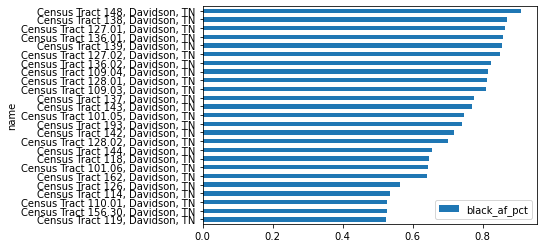

<Figure size 800x640 with 0 Axes>

In [9]:
race_sorted.plot(x='name', y='black_af_pct', kind='barh')
figure(figsize=(10, 8), dpi=80)
plt.show()

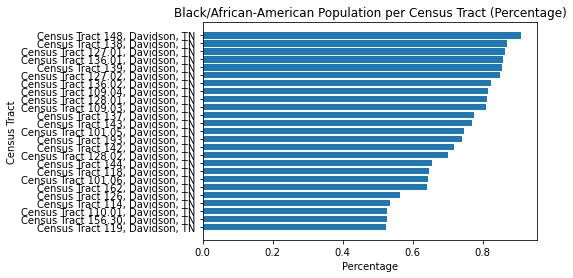

<Figure size 720x576 with 0 Axes>

In [23]:
fig, ax = plt.subplots()

ax.barh(race_sorted.name, race_sorted.black_af_pct, align='center')
ax.set_ylabel('Census Tract')
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage')
ax.set_title('Black/African-American Population per Census Tract (Percentage)')
plt.figure(figsize=(10,8)) 
#plt.savefig('pred_black_tracts_graph')
plt.show()

## Now I want to make a chloropleth map of the same information. For this I will import the geojson file. 

In [26]:
race_geo = gpd.read_file('../data/davidson_tracts_pred_black.geojson')
race_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geoid       25 non-null     object  
 1   name        25 non-null     object  
 2   total_pop   25 non-null     float64 
 3   total_pop_  25 non-null     float64 
 4   white_alon  25 non-null     float64 
 5   white_al_1  25 non-null     float64 
 6   black_afri  25 non-null     float64 
 7   black_af_1  25 non-null     float64 
 8   nativeamer  25 non-null     float64 
 9   nativeam_1  25 non-null     float64 
 10  asian_alon  25 non-null     float64 
 11  asian_al_1  25 non-null     float64 
 12  hawaiian_p  25 non-null     float64 
 13  hawaiian_1  25 non-null     float64 
 14  other_alon  25 non-null     float64 
 15  other_al_1  25 non-null     float64 
 16  two_or_mor  25 non-null     float64 
 17  two_or_m_1  25 non-null     float64 
 18  two_includ  25 non-null     float64 
 19  tw

In [31]:
# Initialize folium map.
sample_map = folium.Map(location = (36.1627, -86.7816), zoom_start = 11)
sample_map

In [40]:
# Initialize folium map.
tract_map = folium.Map(location = (36.1627, -86.7816), zoom_start = 11)

# Set up Choropleth map
folium.Choropleth(
geo_data=race_geo,
data=race_geo,
columns=['name','black_af_p'],
key_on='feature.properties.name',
fill_color='YlGnBu',
fill_opacity=.8,
line_opacity=0.3,
legend_name="Black/African-American Percentage",
smooth_factor=0,
Highlight= True,
line_color = "#000000",
name = "Black/African-American Percentage",
show=False,
overlay=True,
nan_fill_color = "White"
).add_to(tract_map)

tract_map